In [22]:
import xarray as xr
import rasterio
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import YlOrBr, Greys, Blues, Reds, Greens, Blues_r
import matplotlib.colors as colors
import matplotlib

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as f

#### PLOT COLOR SCHEMES

Basis:
- #FFFFCC (yellow)
- #FFEDA0 (light yellow)
- #FED976 (light orange)
- #FC8D59 (orange)
- #E34A33 (reddish orange)
- #B30000 (brownish red)
- #662506 (dark brown)
- #808080 (gray)
- #D3D3D3 (lightgray)

More:
- #FEE6CE (pale orange)
- #FDAE6B (bright orange)
- #FDBB84 (warm orange)
- #FC8D62 (coral)
- #EF6548 (reddish coral)
- #D7301F (dark coral)
- #8B0000 (dark red-brown)

light yellow / white: #ffffe5

orange: #fead3a

brown/red: #9c3605      or      firebrick

gray: #808080

lightgray: #D3D3D3

In [2]:
cmap = YlOrBr
cmap.set_bad('gray',1.)
cmap = cmap

In [46]:
### COLORBAR SETTINGS ###

label = "$d_{opt}$ (mm)" # Target label
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size
cbar.ax.annotate('melt', (0.23,0.71), rotation=90, fontsize=10) # melt line text
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1) # melt line 
# aspect = 15

### TITLE SETTINGS ###
ax.set_title(title, fontsize=14, pad=13) # title


### LABEL SETTINGS ###
ax.set_xlabel(label, fontsize=12)
ax.set_ylabel(label, fontsize=12)

## METHODS

### Data Quality Check: Dotted and Striped Optical Data

In [3]:
dotted_path = r"../Data/optical-rs/2019-05-25_grain_diameter.tif"
striped_path = r"../Data/optical-rs/2017-08-01_grain_diameter.tif"

dotted_data = xr.open_dataarray(dotted_path)
striped_data = xr.open_dataarray(striped_path)

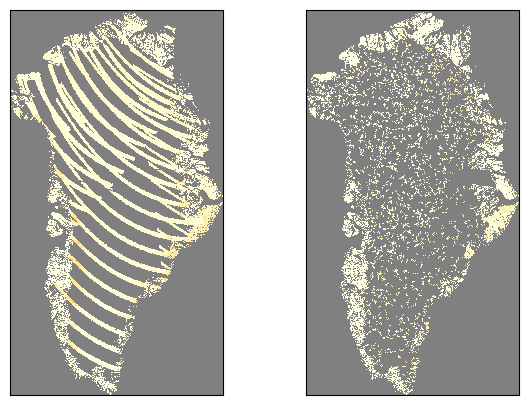

In [22]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(7,5))



dotted_im = dotted_data.plot(ax=axs[0], cmap=cmap, add_colorbar=False)
axs[0].set_title('')


# Plot the continuous data
striped_im = striped_data.plot(ax=axs[1], cmap=cmap, add_colorbar=False)
axs[1].set_title('')

# Adjust the aspect ratio of both subplots to be equal
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Hide the x-axis and y-axis labels for both subplots
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_ylabel('')



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

plt.subplots_adjust(wspace=0.2)
plt.show()

### Raster Alignment Section - Example Microwave vs. Optical

In [10]:
opt_path = r"../Data/optical-rs/2019-07-03_grain_diameter.tif"
mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-03_mw.tif"

data_mw_tif = xr.open_dataarray(mw_path_tif)
data_opt = xr.open_dataarray(opt_path)

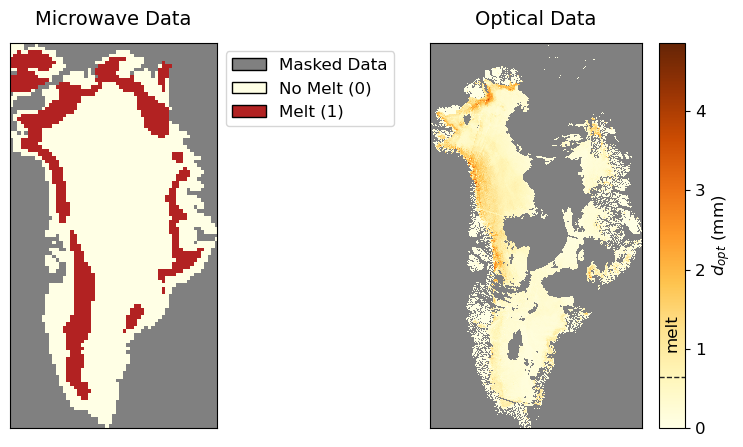

In [19]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(10,5))



# Plot the categorical data
colors_list = ["#808080", "#ffffe5", "firebrick"]  # Blue, Green, Red
# Create the colormap
my_cmap = colors.ListedColormap(colors_list)
cat_im = data_mw_tif.plot(ax=axs[0], cmap=my_cmap, add_colorbar=False)
axs[0].set_title('Microwave Data', pad=13)
# set title font size
axs[0].title.set_size(14)


# Add legend to categorical data plot
legend_labels = ['Masked Data', 'No Melt (0)', 'Melt (1)']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors_list[i]) for i in range(3)]
# Iterate through the handles and call `set_edgecolor` on each
for ha in legend_handles:
    ha.set_edgecolor("black")

axs[0].legend(legend_handles, legend_labels, bbox_to_anchor=(1.9,1), fontsize=12)


# Plot the continuous data
cont_im = data_opt.plot(ax=axs[1], cmap=cmap, add_colorbar=False)
axs[1].set_title('Optical Data', pad=13)
# set title font size
axs[1].title.set_size(14)



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# Get the colorbar instance
cbar = plt.colorbar(cont_im, ax=axs[1], **cbar_kwargs, aspect=15)
cbar.ax.tick_params(labelsize=12)  # Set the desired label size
# Set the label size
cbar.ax.yaxis.label.set_size(12)
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.21,1), rotation=90, fontsize=12)


plt.show()

## RESULTS

### FILL PREDICTION PLOT

In [61]:
# RUN ONLY INITIALLY OR IF MODEL CHANGES

date = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=True)
data = f.data_normalization(data)
data.head()

for model_name in ["LinearRegression"]:#, "LassoRegression", "RandomForest", "XGBoost"]:
    model = f.load_object(model_name)
    data_predicted = f.mean_predict(model, data)
    f.save_prediction_tif(data_predicted, "mean", f"../Data/results/{model_name}_2019-08-14_meanPredOnly.tif")

100%|██████████| 1/1 [00:01<00:00,  1.52s/it]
c:\Users\ninaz\anaconda3\envs\master-thesis-3.9\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


100%|██████████| 2278725/2278725 [05:32<00:00, 6860.28it/s] 


In [15]:
path_opt = r"../Data/optical-rs/2019-08-14_grain_diameter.tif"
path_lasso = r"../Data/results/LassoRegression_2019-08-14_meanPredOnly.tif"

data_opt = xr.open_dataarray(path_opt)
data_lasso = xr.open_dataarray(path_lasso)

data_opt = data_opt.sel(y=data_lasso.y, x=data_lasso.x)

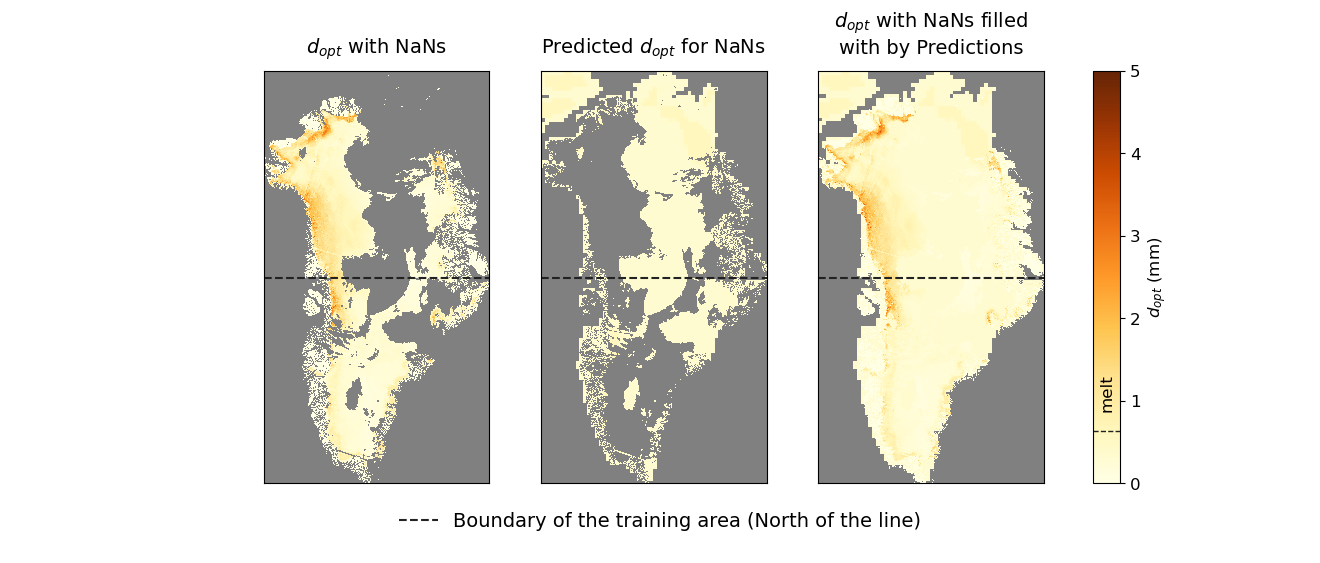

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(13, 8), gridspec_kw={'width_ratios': [1, 1, 1.43]})

# Optical Data for 15.07.2019
p_opt = data_opt.plot(cmap=cmap, ax=axs[0], add_colorbar=False)
p_opt.set_clim(0, 5)
axs[0].axhline(y=-2000000.0, color='#222222', linestyle='--')

# Decision Tree Classifier where Pred is NaN for 15.07.2019
cmap2 = YlOrBr
cmap2.set_bad('gray',1.)
p_dtr = data_lasso.where(np.isnan(data_opt), drop=True).plot(cmap=cmap2, ax=axs[1], add_colorbar=False)   # set max of colorbar = 3 to make melting more clear as most values are below 3 
p_dtr.set_clim(0, 5)
axs[1].axhline(y=-2000000.0, color='#222222', linestyle='--')


p_opt2 = data_opt.plot(cmap=cmap, ax=axs[2], add_colorbar=False)

p_full = data_lasso.where(np.isnan(data_opt), drop=True).plot(cmap="YlOrBr",ax=axs[2], add_colorbar=False)
axs[2].axhline(y=-2000000.0, color='#222222', linestyle='--')


plots = [p_opt, p_dtr, p_full]
titles = ["$d_{opt}$ with NaNs", "Predicted $d_{opt}$ for NaNs", "$d_{opt}$ with NaNs filled\nwith by Predictions"]
for idx, plot in enumerate(plots):
    #plot.axes.title.set_size(15)
    plot.axes.set_title(titles[idx], size=14, pad=13)


for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(right=0.8)


cbar = plt.colorbar(p_full, location='right', pad=0.15, shrink=0.67, aspect=15)
cbar.set_label("$d_{opt}$ (mm)")
# increase size of cbar labels
cbar.ax.tick_params(labelsize=12)
# increase size of cbar lable
cbar.ax.yaxis.label.set_size(12)
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.25,0.9), rotation=90, fontsize=12)
# set cbar clim
p_full.set_clim(0, 5)


# Add legend handle at the bottom
legend_elements = [Line2D([0], [0], color='#222222', linestyle='--', label='Boundary of the training area (North of the line)')]
legend_ax = fig.add_axes([-0.07, 0.15, 1, 0.08])
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=1, frameon=False, fontsize=14) 

fig.subplots_adjust(hspace=0.2)  # Adjust the hspace value as desired
plt.show()


### MEAN PRED, STD, ERROR GRID

In [ ]:
date = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=False)
data = f.data_normalization(data)
data.head()

**ONLY RUN THIS CELL IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE**

In [ ]:
# ONLY RUN IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE

for idx1, model_name in enumerate(["LinearRegression", "LassoRegression", "RidgeRegression", "ElasticNetRegression", "RandomForest", "XGBoost"]):
#for idx1, model_name in enumerate(["LassoRegression"]):
    model = f.load_object(model_name)
    data_predicted = f.mean_predict(model, data)

    #for metric in ["mean", "std", "error"]:
    for metric in ["error", "residual"]:
        print(model_name, metric)
        f.save_prediction_tif(data_predicted, metric, f"../Data/results/{model_name}_2019-08-14_{metric}.tif")
    print()

C:\Users\ninaz\AppData\Local\Temp\ipykernel_704\4222972631.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


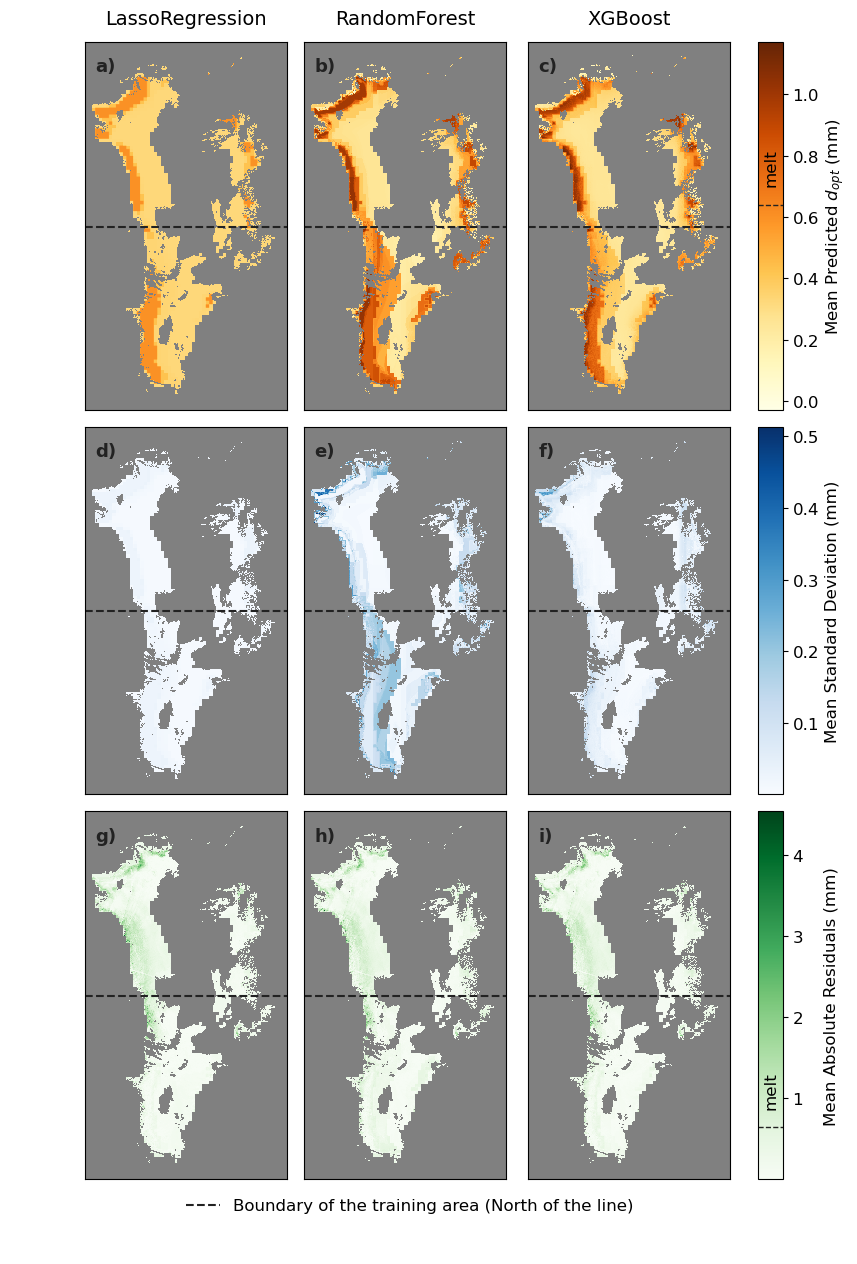

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(8, 12), gridspec_kw={'width_ratios': [1, 1, 1.34]})

# Titles for each column
cols = ["LassoRegression", "RandomForest", "XGBoost"]
rows = ["mean", "std", "error"]
cbar_labels = ["Mean Predicted $d_{opt}$ (mm)", "Mean Standard Deviation (mm)", "Mean Absolute Residuals (mm)"]

plot_numbering = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]


# add subplot to each axis
for idx1, model_name in enumerate(cols):
    for idx2, metric in enumerate(rows):

        data_tif = xr.open_dataarray(f"../Data/results/{model_name}_2019-08-14_{metric}.tif")

        if metric == "mean":
            cmap = YlOrBr
            cmap.set_bad('gray', 1.)
            vmin, vmax = -0.02851607, 1.1704209
        elif metric == "std":
            cmap = Blues
            cmap.set_bad('gray', 1.)
            vmin, vmax = 0.0005309597, 0.5135851
        else:
            cmap = Greens
            cmap.set_bad('gray', 1.)
            vmin, vmax = 0.00000007736733, 4.5371265

        ax = axs[idx2, idx1]
        im = data_tif.plot(cmap=cmap, ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False)
        #im = data_tif.plot(cmap=cmap, ax=ax, add_colorbar=True)
        ax.set_aspect("equal")
        ax.axes.get_xaxis().set_visible(False)
        ax.set_yticks([])
        # set xtick size
        ax.tick_params(axis='x', which='major', labelsize=12)
        ax.set_ylabel("")
        ax.set_title("")
        ax.axhline(y=-2000000.0, color='#222222', linestyle='--')
        # add plot_numbering to right lower corner of each plot
        ax.annotate(plot_numbering[idx2*3+idx1], (0.05,0.92), xycoords='axes fraction', fontsize=13, weight='bold', color='#222222')

         # Create a color bar for the rightmost plot of each row
        if idx1 == len(cols) - 1:
            cbar = plt.colorbar(im, ax=axs[idx2, idx1], location='right', pad=0.1, shrink=1, aspect=15)
            cbar.set_label(cbar_labels[idx2])
            # increase size of cbar labels
            cbar.ax.tick_params(labelsize=12)
            # increase size of cbar lable
            cbar.ax.yaxis.label.set_size(12)
            cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)    
            if idx2 != 0:
                # set spacing between cbar and cbar label
                #cbar.ax.yaxis.labelpad = 13
                cbar.ax.annotate('melt', (0.23,0.9), rotation=90, fontsize=12)
            else:
                cbar.ax.annotate('melt', (0.23,0.71), rotation=90, fontsize=12)
            if idx2 == 2:
                cbar.ax.yaxis.labelpad = 15



for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=14, pad=13)

#for ax, row in zip(axs[:,0], rows):
    #ax.text(0.5, 1, row, fontsize=14, ha='center', va='center', rotation=90)
    #ax.set_ylabel(row, fontsize=14, rotation=90, labelpad=15)

# Add legend handle at the bottom
legend_elements = [Line2D([0], [0], color='#222222', linestyle='--', label='Boundary of the training area (North of the line)')]
legend_ax = fig.add_axes([-0.07, -0.05, 1, 0.08])
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=1, frameon=False, fontsize=12) 

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()

### ACTUAL VS PREDICTED MAP

In [17]:
data_actual = xr.open_dataarray("../Data/optical-rs/2019-08-14_grain_diameter.tif")

data = [data_actual]
model_names = ["LassoRegression", "RandomForest", "XGBoost"]
for model in model_names:
    data.append(xr.open_dataarray(f"../Data/results/{model}_2019-08-14_mean.tif"))

C:\Users\ninaz\AppData\Local\Temp\ipykernel_19816\3887805747.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


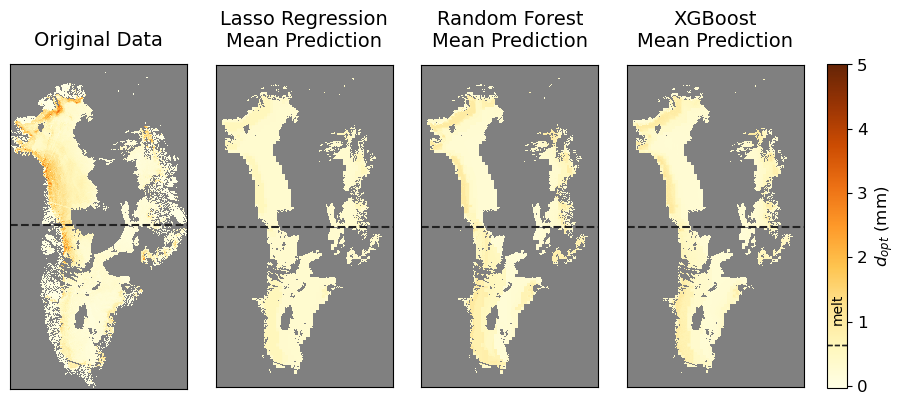

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(11, 8), gridspec_kw={'width_ratios': [1, 1, 1, 1.33], 'height_ratios': [1], 'wspace': 0.15})

titles = ["Original Data", "Lasso Regression\nMean Prediction", "Random Forest\nMean Prediction", "XGBoost\nMean Prediction"]

for idx, prediction in enumerate(data):

    ax = axs[idx]
    im = prediction.plot(cmap=cmap, ax=ax, vmin=-0.02851607, vmax=5, add_colorbar=False)

    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.set_ylabel("")
    ax.set_title("")
    ax.axhline(y=-2000000.0, color='#222222', linestyle='--')
    ax.set_title(titles[idx], fontsize=14, pad=13)

    # Create a color bar for the rightmost plot of each row
    if idx == len(data) - 1:
        cbar = plt.colorbar(im, ax=ax, location='right', pad=0.1, shrink=0.525, aspect=16)
        cbar.set_label("$d_{opt}$ (mm)")
        # increase size of cbar labels
        cbar.ax.tick_params(labelsize=12)
        # increase size of cbar lable
        cbar.ax.yaxis.label.set_size(12)
        cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
        cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)    
        cbar.ax.annotate('melt', (0.19,1), rotation=90, fontsize=10)



plt.tight_layout()
plt.show()

### UPPER VS LOWER HALF PLOTS

#### Pred vs. Actual

In [13]:
date_from = "2019-08-01"
date_to = "2019-08-20"

# date_from = "2019-08-02"
#date_to = "2019-08-02"

path = r"D:/MasterThesis/Data/combined/dataframe_extended/"
data = f.import_data(date_from=date_from, date_to=date_to, df_path=path, predict_only=False)
data = f.data_normalization(data)

100%|██████████| 20/20 [01:11<00:00,  3.58s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


In [14]:
LassoReg = f.load_object('LassoRegression')
RandomForest = f.load_object('RandomForest')
GradientBoosting = f.load_object('XGBoost')

In [15]:
lasso_pred = f.mean_predict(LassoReg, data)[["row", "col", "mean_prediction", "error_prediction", "opt_value"]]
rf_pred = f.mean_predict(RandomForest, data)[["row", "col", "mean_prediction","error_prediction", "opt_value"]]
xgb_pred = f.mean_predict(GradientBoosting, data)[["row", "col", "mean_prediction", "error_prediction","opt_value"]]

preds = [lasso_pred, rf_pred, xgb_pred]

In [71]:
#data_temp = preds[idx]
data_temp = xgb_pred
north_predicted = data_temp[data_temp.row < 1338][["mean_prediction", "opt_value"]]
south_predicted = data_temp[data_temp.row >= 1338][["mean_prediction", "opt_value"]]

          Lasso Prediction     RF Prediction   XGBoost Prediction    Actual
North: 0.42812966589414203 -  0.5145308242429714 -  0.513165403166654     -   0.7407609

South: 0.4316518725461168 -   0.5549714402414228 -  0.5103939782600435   -    0.51238614


XGBoost


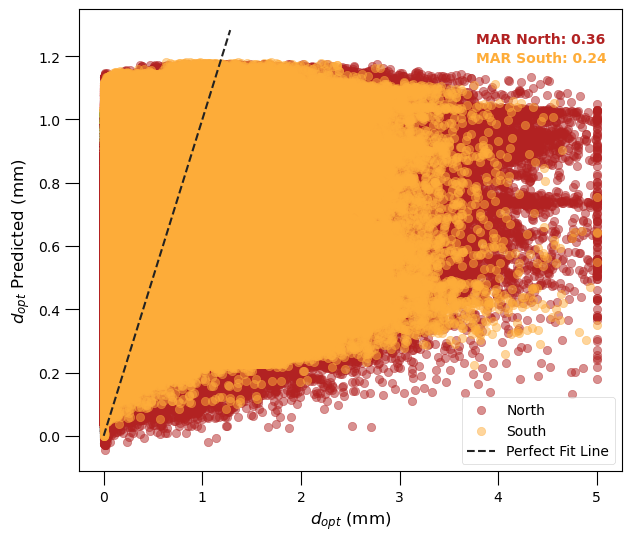

In [50]:
model_list = ["Lasso Regression", "Random Forest", "XGBoost"]
#model_list = ["XGBoost"]
for idx, model in enumerate(model_list):
#for idx, model in enumerate(["Lasso"]):
    print(model)

    #data_temp = preds[idx]
    data_temp = xgb_pred
    north_predicted = data_temp[data_temp.row < 1338][["mean_prediction", "opt_value"]]
    south_predicted = data_temp[data_temp.row >= 1338][["mean_prediction", "opt_value"]]

    max_value = max(north_predicted.mean_prediction.max(), south_predicted.mean_prediction.max())


    north_error = data_temp[data_temp.row < 1338]["error_prediction"].mean()
    south_error = data_temp[data_temp.row >= 1338]["error_prediction"].mean()


    # Create scatter plot
    plt.figure(figsize=(7,6))
    plt.scatter(north_predicted["opt_value"], north_predicted["mean_prediction"], c='firebrick', label='North', alpha=0.5)
    plt.scatter(south_predicted["opt_value"], south_predicted["mean_prediction"], c='#fead3a', label='South',  alpha=0.5)

    plt.rcParams['patch.linewidth'] = 0.5

    # Plotting the perfect prediction line
    plt.plot([0, max_value+0.1], [0, max_value+0.1], '--', color="#222222", label='Perfect Fit Line')

    text_north = f"MAR North: {north_error:.2f}"
    text_south = f"MAR South: {south_error:.2f}"

    plt.text(0.97, 0.95, text_north, transform=plt.gca().transAxes, ha='right', va='top', color='firebrick', fontsize=10, weight='bold')
    plt.text(0.9725, 0.91, text_south, transform=plt.gca().transAxes, ha='right', va='top', color='#fead3a', fontsize=10, weight='bold')


    plt.xlabel('$d_{opt}$ (mm)', fontsize=12)
    plt.ylabel('$d_{opt}$ Predicted (mm)', fontsize=12)
    plt.tick_params(axis='both', which='major', size=10)
    plt.legend(fontsize=10, loc='lower right', frameon=True)
    plt.show()

#### FEATURES ON MAP

##### MW

In [86]:
pred_path =  r"../Data/results/LinearRegression_2019-08-14_meanPredOnly.tif"
mw_data_path =  r"D:/MasterThesis/Data/microwave-rs/mw_interpolated/2019-08-14_mw.tif"

pred = xr.open_dataarray(pred_path)
data_mw = xr.open_dataarray(mw_data_path)
data_mw = data_mw.where(data_mw == 1, drop=True)

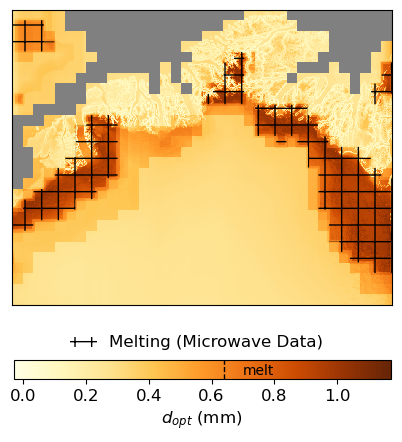

In [232]:
fig = plt.figure()

# Predictions
p = pred[0][:700,200:1100].plot(cmap=cmap, vmin=pred.min(), vmax=pred.max(), cbar_kwargs={"orientation":"horizontal", "fraction":0.051, "pad":0.15})

axs = plt.gcf().get_axes()
axs[0].set_title("")
axs[1].set_xlabel("$d_{opt}$ (mm)", fontsize=12)

# Microwave Data
m = plt.contourf(data_mw.x, data_mw.y, data_mw[0], hatches=["+"], alpha=0)


#proxy = [plt.Line2D([0,1], [0,1], color="black", alpha=0.8)]
#plt.legend(proxy, ["Elevation contour at shown metre level"], loc="lower right", bbox_to_anchor=(1.02, -0.25), frameon=False)
proxy = [plt.Rectangle((6,4), 5, 1, facecolor="white", alpha=0, hatch="+")]
plt.legend(proxy, ["Melting (Microwave Data)"], loc="lower right",  bbox_to_anchor=(0.85, -0.195), frameon=False)
# set legend fontsize to 12
plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')


frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

cbar = p.colorbar
cbar.ax.axvline(x=0.64, c='black', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.7, 0.25))
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size

plt.show()

#### ELEVATION

In [157]:
xgb_pred_path =  r"../Data/results/XGBoost_2019-08-14_meanPredOnly.tif"
path_elevation =  r"D:/MasterThesis/Data/elevation_data/gimpdem_1km_compressed.tif"
path_original = r"D:/MasterThesis/Data/optical-rs/unzipped/2019-08-14_grain_diameter.tif"

xgb_pred = xr.open_dataarray(xgb_pred_path)
data_elevation = xr.open_dataarray(path_elevation)
data_original = xr.open_dataarray(path_original)

data_elevation = data_elevation.where(data_elevation.x <= xgb_pred.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= xgb_pred.y.min(), drop=True)     # crop to the same extent (y)

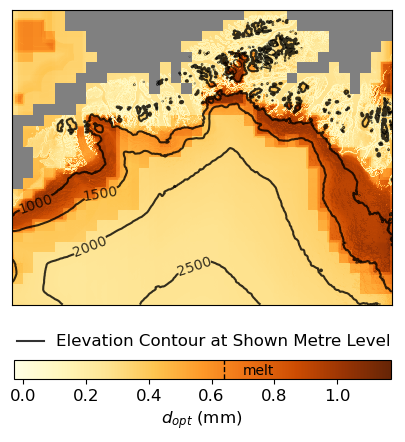

In [240]:
fig = plt.figure()


cmap = YlOrBr
cmap.set_bad('gray',1.)


# Prediction Data
p = xgb_pred[0][:700,200:1100].plot(cmap=cmap, vmin=xgb_pred.min(), vmax=xgb_pred.max(),cbar_kwargs={"orientation":"horizontal", "fraction":0.051, "pad":0.15})

axs = plt.gcf().get_axes()
axs[0].set_title("")
axs[1].set_xlabel("$d_{opt}$ (mm)", fontsize=12)

# ELevation Data
e = plt.contour(data_elevation.x[200:1100], data_elevation.y[:700], data_elevation[0][:700,200:1100], colors="black", alpha=0.8,
            levels = list(range(1000, 3001, 500)))
plt.clabel(e, e.levels, inline=True, fontsize=10)


proxy = [plt.Line2D([0,1], [0,1], color="black", alpha=0.8)]
plt.legend(proxy, ["Elevation Contour at Shown Metre Level"], loc="lower right", bbox_to_anchor=(1.028, -0.19), frameon=False)
# set legend font size to 12
plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')


frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

cbar = p.colorbar
cbar.ax.axvline(x=0.64, c='black', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.7, 0.25))
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size

plt.show()

#### MW MEAN_9

In [123]:
xgb_pred_path =  r"../Data/results/XGBoost_2019-08-14_meanPredOnly.tif"
mean_9_data_path =  r"D:/MasterThesis/Data/combined/dataframe_extended/melt_2019-08-14_extended.parquet.gzip"

xgb_pred = xr.open_dataarray(xgb_pred_path)
mean_9_data = pd.read_parquet(mean_9_data_path)
mean_9_data = mean_9_data[["x", "y", "mean_9"]]
# convert to xarray with x and y as coordinates and mean_9 as band_data
mean_9_data = mean_9_data.set_index(["y", "x"]).to_xarray()
mean_9_data = mean_9_data.mean_9
# only keep data where mean_9 is not nan
mean_9_data = mean_9_data.where(~mean_9_data.isnull(), drop=True)

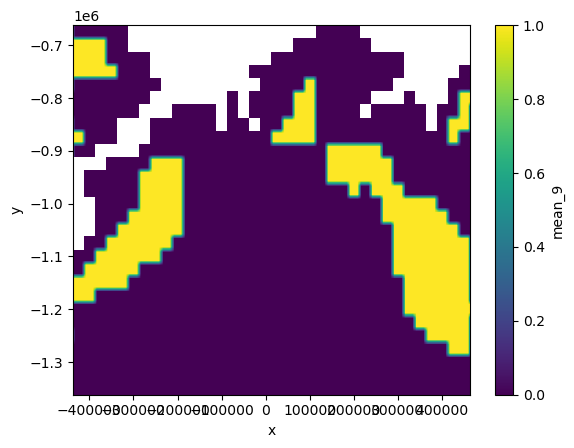

In [364]:
mean_9_data[-700:,200:1100].plot()

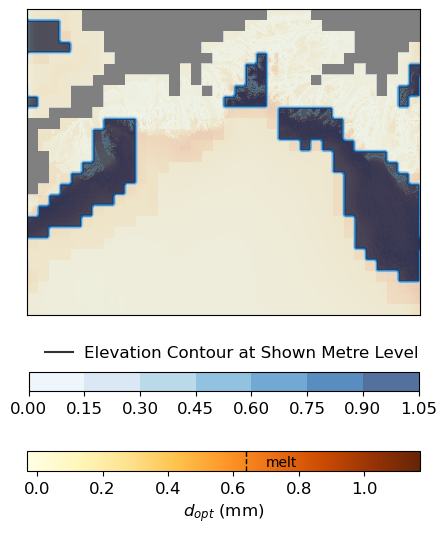

In [360]:
fig = plt.figure(figsize=(6,6))


cmap = YlOrBr
cmap.set_bad('gray',1.)


# Prediction Data
p = xgb_pred[0][:700,200:1100].plot(cmap=cmap, vmin=xgb_pred.min(), vmax=xgb_pred.max(),cbar_kwargs={"orientation":"horizontal", "fraction":0.0425, "pad":0.13})

axs = plt.gcf().get_axes()
axs[0].set_title("")
axs[1].set_xlabel("$d_{opt}$ (mm)", fontsize=12)

# create cmap:
#cmap = colors.ListedColormap(['white', 'lightgrey', 'grey', 'black'])
bluez = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#CCE8F7', "#B7D8E9",  '#85B0C6', '#CCE8F7']) # dark- light ('#628DA2',darkest)

#slope_plot = plt.contourf(data_elevation.x[200:1100], data_elevation.y[:700], slope[-700:,200:1100], cmap="viridis", alpha=0.5)
mean_9_plot = plt.contourf(mean_9_data.x[200:1100], mean_9_data.y[-700:], mean_9_data[-700:, 200:1100], cmap=Blues, alpha=0.7)

# Adjust transparency and colormap of the slope plot to avoid overshadowing the prediction map
mean_9_plot.set_clim(0, 1)  # Set appropriate maximum slope value


proxy = [plt.Line2D([0,1], [0,1], color="black", alpha=0.8)]
plt.legend(proxy, ["Elevation Contour at Shown Metre Level"], loc="lower right", bbox_to_anchor=(1.028, -0.19), frameon=False)
# set legend font size to 12
plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')


frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

cbar = p.colorbar
cbar.ax.axvline(x=0.64, c='black', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.7, 0.25))
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size

# add colorbar to the slope plot
cbar = plt.colorbar(mean_9_plot, orientation="horizontal", fraction=0.051)
# make colorbar orientation horizontal
#cbar.ax.set_xlabel("Slope (°)", fontsize=12)
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size


plt.show()

#### SLOPE

In [28]:
pred_path =  r"../Data/results/XGBoost_2019-08-14_meanPredOnly.tif"
slope_path =  r"D:/MasterThesis/Data/combined/dataframe_extended/melt_2019-08-14_extended.parquet.gzip"
path_elevation =  r"D:/MasterThesis/Data/elevation_data/gimpdem_1km_compressed.tif"


xgb_pred = xr.open_dataarray(pred_path)

slope = pd.read_parquet(slope_path)
slope = slope[["x", "y", "slope_data"]]
# convert to xarray with x and y as coordinates and mean_9 as band_data
slope = slope.set_index(["y", "x"]).to_xarray()
slope = slope.slope_data
# only keep data where slope_data is not nan
slope = slope.where(~slope.isnull(), drop=True)

data_elevation = xr.open_dataarray(path_elevation)
data_elevation = data_elevation.where(data_elevation.x <= xgb_pred.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= xgb_pred.y.min(), drop=True)     # crop to the same extent (y)

# crop slope to the same extent 
slope = slope.where(slope.x <= xgb_pred.x.max(), drop=True)     # crop to the same extent (x)
slope = slope.where(slope.y >= xgb_pred.y.min(), drop=True)     # crop to the same extent (y)

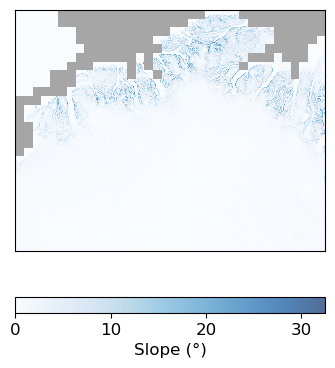

In [58]:
fig = plt.figure(figsize=(4,4))


cmap = Blues
cmap.set_bad('gray',1.)


# Prediction Data
#p = xgb_pred[0][:700,200:1100].plot(cmap=cmap, vmin=xgb_pred.min(), vmax=xgb_pred.max(),cbar_kwargs={"orientation":"horizontal", "fraction":0.0425, "pad":0.13})

#axs = plt.gcf().get_axes()
#axs[0].set_title("")
#axs[1].set_xlabel("$d_{opt}$ (mm)", fontsize=12)

# create cmap:
#cmap = colors.ListedColormap(['white', 'lightgrey', 'grey', 'black'])
#bluez = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#CCE8F7', "#B7D8E9",  '#85B0C6', '#CCE8F7']) # dark- light ('#628DA2',darkest)

#slope_plot = plt.contourf(data_elevation.x[200:1100], data_elevation.y[:700], slope[-700:,200:1100], cmap="viridis", alpha=0.5)
slope_plot = slope[-700:,200:1100].plot(cmap=cmap, alpha=0.7, add_colorbar=False)
# remove title
axs = plt.gcf().get_axes()
axs[0].set_title("")

# Adjust transparency and colormap of the slope plot to avoid overshadowing the prediction map
#slope_plot.set_clim(0, slope.max())  # Set appropriate maximum slope value


frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)


# add colorbar to the slope plot
cbar = plt.colorbar(slope_plot, orientation="horizontal", fraction=0.051)
# make colorbar orientation horizontal
cbar.ax.set_xlabel("Slope (°)", fontsize=12)
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size


plt.show()

#### ASPECT

In [72]:
xgb_pred_path =  r"../Data/results/XGBoost_2019-08-14_meanPredOnly.tif"
aspect_path =  r"D:/MasterThesis/Data/combined/dataframe_extended/melt_2019-08-14_extended.parquet.gzip"
path_elevation =  r"D:/MasterThesis/Data/elevation_data/gimpdem_1km_compressed.tif"


xgb_pred = xr.open_dataarray(xgb_pred_path)

aspect = pd.read_parquet(aspect_path)
aspect = aspect[["x", "y", "aspect_data"]]
# convert to xarray with x and y as coordinates and mean_9 as band_data
aspect = aspect.set_index(["y", "x"]).to_xarray()
aspect = aspect.aspect_data
# only keep data where slope_data is not nan
aspect = aspect.where(~aspect.isnull(), drop=True)

data_elevation = xr.open_dataarray(path_elevation)
data_elevation = data_elevation.where(data_elevation.x <= xgb_pred.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= xgb_pred.y.min(), drop=True)     # crop to the same extent (y)

# crop slope to the same extent 
aspect = aspect.where(aspect.x <= xgb_pred.x.max(), drop=True)     # crop to the same extent (x)
aspect = aspect.where(aspect.y >= xgb_pred.y.min(), drop=True)     # crop to the same extent (y)

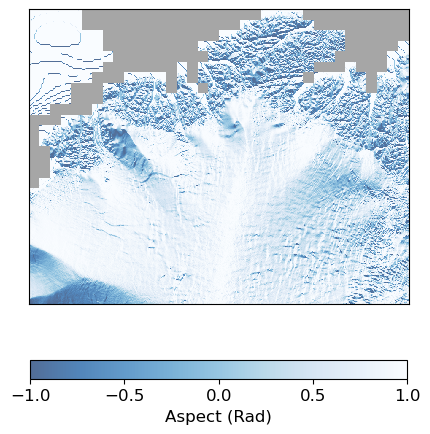

In [73]:
fig = plt.figure()


cmap = Blues_r
cmap.set_bad('gray',1.)


# Prediction Data
#p = xgb_pred[0][:700,200:1100].plot(cmap=cmap, vmin=xgb_pred.min(), vmax=xgb_pred.max(),cbar_kwargs={"orientation":"horizontal", "fraction":0.0425, "pad":0.13})

#axs = plt.gcf().get_axes()
#axs[0].set_title("")
#axs[1].set_xlabel("$d_{opt}$ (mm)", fontsize=12)

# create cmap:
#cmap = colors.ListedColormap(['white', 'lightgrey', 'grey', 'black'])
bluez = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#CCE8F7', "#B7D8E9",  '#85B0C6', '#CCE8F7']) # dark- light ('#628DA2',darkest)

#slope_plot = plt.contourf(data_elevation.x[200:1100], data_elevation.y[:700], slope[-700:,200:1100], cmap="viridis", alpha=0.5)
#aspect_plot = plt.contourf(aspect.x[200:1100], aspect.y[-700:], aspect[-700:, 200:1100], cmap=Blues, alpha=0.7)
aspect_plot = aspect[-700:, 200:1100].plot(cmap=cmap, alpha=0.7, add_colorbar=False)
# remove title
axs = plt.gcf().get_axes()
axs[0].set_title("")

# Adjust transparency and colormap of the slope plot to avoid overshadowing the prediction map
#aspect_plot.set_clim(0, aspect.max())  # Set appropriate maximum slope value



frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

#cbar = p.colorbar
#cbar.ax.axvline(x=0.64, c='black', linestyle='--', linewidth=1)
#cbar.ax.annotate('melt', (0.7, 0.25))
#cbar.ax.tick_params(labelsize=12) # xtick label size
#cbar.ax.yaxis.label.set_size(12) # colorbar label size

# add colorbar to the slope plot
cbar = plt.colorbar(aspect_plot, orientation="horizontal", fraction=0.051)
# make colorbar orientation horizontal
cbar.ax.set_xlabel("Aspect (Rad)", fontsize=12)
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size


plt.show()

In [62]:
pred_path =  r"../Data/results/XGBoost_2019-08-14_meanPredOnly.tif"
aspect_path =  r"D:/MasterThesis/Data/combined/dataframe_extended/melt_2019-08-14_extended.parquet.gzip"
path_elevation =  r"D:/MasterThesis/Data/elevation_data/gimpdem_1km_compressed.tif"


aspect = pd.read_parquet(aspect_path)
aspect = aspect[["x", "y", "hours_of_daylight"]]
# convert to xarray with x and y as coordinates and mean_9 as band_data
aspect = aspect.set_index(["y", "x"]).to_xarray()
aspect = aspect.hours_of_daylight
# only keep data where slope_data is not nan
aspect = aspect.where(~aspect.isnull(), drop=True)

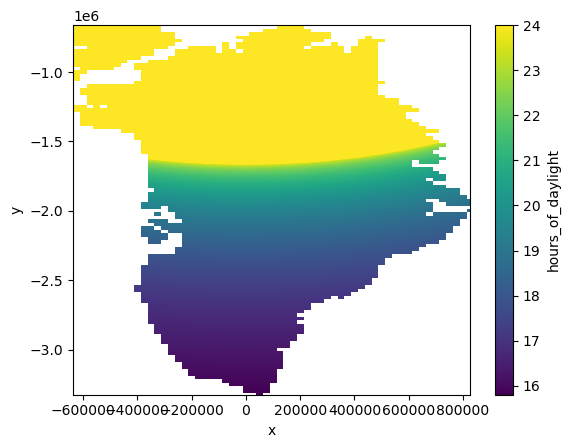

In [63]:
aspect.plot()

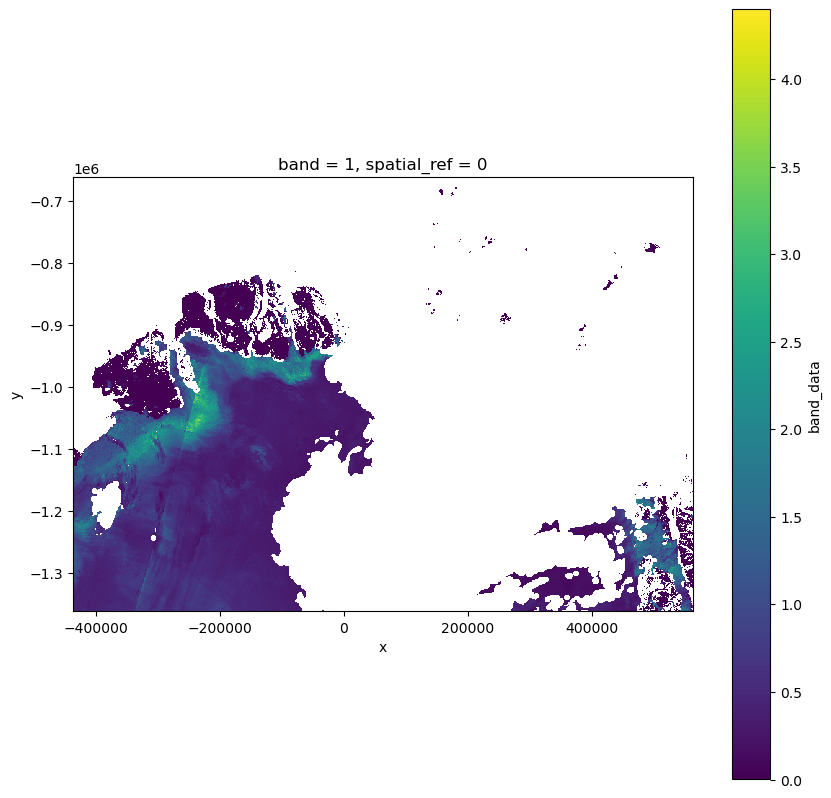

In [69]:
d = xr.open_dataarray("../Data/optical-rs/2019-08-14_grain_diameter.tif")

# crop to the same extent as aspect data
d = d.where(d.x <= aspect.x.max(), drop=True)     # crop to the same extent (x)
d = d.where(d.y >= aspect.y.min(), drop=True)     # crop to the same extent (y)

d[0][:700, 200:1200].plot(figsize=(10,10))


# set frame equal
frame = plt.gca()
frame.set_aspect('equal', adjustable='box')